# test 1-8 SVM BP DNN LSTM-WDWDR

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras
import catboost as cb
from pandas import read_csv
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import svm
from keras.layers.core import Dense, Activation, Dropout
from sklearn.externals import joblib
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passi

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(allow_soft_placement = True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
config.gpu_options.allow_growth = True
sess0 = tf.InteractiveSession(config = config)

In [3]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs


In [4]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_SpringsLSTM.ipynb',
 'Alice_SpringsWPD-LSTM.ipynb',
 'Alice_Springs_2016-2020',
 'Alice_Springs数据集筛选提取.ipynb',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'test1-8_SVM&BP&DNN&LSTM.ipynb',
 'venv',
 'WPD.ipynb',
 '画图.ipynb',
 '相关性分析图.py',
 '笔记.ipynb',
 '训练SVM&BP&DNN&LSTM.ipynb']

In [5]:
os.chdir("./Dataset/test")

In [6]:
os.listdir()

['test_1A Trina.csv',
 'test_1B Trina.csv',
 'test_2 ec.csv',
 'test_3 BP.csv',
 'test_4 Kyocera.csv',
 'test_5 Kyocera.csv',
 'test_6 Kyocera.csv',
 'test_7 First.csv',
 'test_8 Kaneka.csv']

In [7]:
file_chdir = os.getcwd()

In [8]:
file_chdir

'E:\\Research Project\\DKASC, Alice Springs\\Dataset\\test'

In [9]:
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
            filecsv_list.append(file)

In [10]:
filecsv_list

['test_1A Trina.csv',
 'test_1B Trina.csv',
 'test_2 ec.csv',
 'test_3 BP.csv',
 'test_4 Kyocera.csv',
 'test_5 Kyocera.csv',
 'test_6 Kyocera.csv',
 'test_7 First.csv',
 'test_8 Kaneka.csv']

In [11]:
testnames=list()
testnames += [('test_%d' % (j)) for j in range(len(filecsv_list))]

In [12]:
testnames

['test_0',
 'test_1',
 'test_2',
 'test_3',
 'test_4',
 'test_5',
 'test_6',
 'test_7',
 'test_8']

In [13]:
for csv in filecsv_list:
    testnames[filecsv_list.index(csv)]=pd.read_csv(csv)

In [14]:
testnames[0]

,Timestamp,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
0,2020/1/1 0:00,2020,1,1,0,0,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0
1,2020/1/1 0:05,2020,1,1,0,5,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0
2,2020/1/1 0:10,2020,1,1,0,10,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0
3,2020/1/1 0:15,2020,1,1,0,15,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0
4,2020/1/1 0:20,2020,1,1,0,20,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0
5,2020/1/1 0:25,2020,1,1,0,25,29.223780,22.275812,1.720813,1.575351,33.423721,0.0,3.426321,0.964147,0.0
6,2020/1/1 0:30,2020,1,1,0,30,29.078783,22.451258,1.753417,1.582172,33.468391,0.0,3.611997,1.257185,0.0
7,2020/1/1 0:35,2020,1,1,0,35,28.957481,22.637762,1.742352,1.633590,33.527313,0.0,3.643157,1.188009,0.0
8,2020/1/1 0:40,2020,1,1,0,40,28.814610,22.835932,1.805557,1.631509,33.590416,0.0,3.819599,1.174781,0.0
9,2020/1/1 0:45,2020,1,1,0,45,28.729786,22.996599,1.671176,1.498169,33.636559,0.0,3.634844,0.964134,0.0


In [15]:
# train = pd.read_csv('train_1A.csv')
# test = pd.read_csv('test_1A.csv')

In [16]:
#查看输入数据维度
# print(train.shape)
for tena in testnames:
    print(tena.shape)

(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)
(26091, 15)


In [17]:
# train.head(5)

In [18]:
for tena in testnames:
    print(tena.head(5))
# test.head(5)

       Timestamp  Year  Month  Day  Hour  Minutes        WTC        WRH  \
0  2020/1/1 0:00  2020      1    1     0        0  29.685360  21.727171   
1  2020/1/1 0:05  2020      1    1     0        5  29.559967  21.878902   
2  2020/1/1 0:10  2020      1    1     0       10  29.530006  21.859453   
3  2020/1/1 0:15  2020      1    1     0       15  29.474438  21.897285   
4  2020/1/1 0:20  2020      1    1     0       20  29.365288  22.085625   

        GHR       DHR         WD  WDR       RGT       RDT  1A Trina_power  
0  1.360221  1.191879  33.216167  0.0  2.958199  0.524153             0.0  
1  1.532208  1.460944  33.254341  0.0  3.288470  0.764565             0.0  
2  1.186835  1.118219  33.302616  0.0  3.253541  0.725652             0.0  
3  1.017349  0.824890  33.337837  0.0  3.260514  0.706365             0.0  
4  1.323369  1.175776  33.375069  0.0  3.148183  0.694154             0.0  
       Timestamp  Year  Month  Day  Hour  Minutes        WTC        WRH  \
0  2020/1/1 0:00  

# 数据预处理训练集去异常值

In [19]:
# #使用df.isnull().sum()来获得与行数None和NaN值。
# train.isnull().sum()

In [20]:
# test.isnull().sum()

for tena in testnames:
    tena.isnull().sum()

In [21]:
# #训练集去掉全是空值的行和列    #axis=0, how='any', thresh=None, subset=None, inplace=False)
# # detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
# # for i in detectioncolumns:
# train.dropna(axis="index",how='any' , inplace=True)  #删除掉全是空值的行
# # train.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列


# test.dropna(axis="index", how='any', inplace=True)  #删除掉全是空值的行
# # test.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [22]:
# #填补缺失值为均值
# #train.ffill({"RGT":train['RGT'].mean()})
# detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
# for i in detectioncolumns:
#     replace_NA=train[i].mean()
#     train[i].fillna(replace_NA,inplace=True)
# #去除测试集空值
# for i in detectioncolumns:
#     replace_NA=test[i].mean()
#     test[i].fillna(replace_NA,inplace=True)


In [23]:
# train.columns

In [24]:
# test.columns
for tena in testnames:
    tena.columns

In [25]:
# train.head()

In [26]:
# test.head()
for tena in testnames:
    print(tena.head())

       Timestamp  Year  Month  Day  Hour  Minutes        WTC        WRH  \
0  2020/1/1 0:00  2020      1    1     0        0  29.685360  21.727171   
1  2020/1/1 0:05  2020      1    1     0        5  29.559967  21.878902   
2  2020/1/1 0:10  2020      1    1     0       10  29.530006  21.859453   
3  2020/1/1 0:15  2020      1    1     0       15  29.474438  21.897285   
4  2020/1/1 0:20  2020      1    1     0       20  29.365288  22.085625   

        GHR       DHR         WD  WDR       RGT       RDT  1A Trina_power  
0  1.360221  1.191879  33.216167  0.0  2.958199  0.524153             0.0  
1  1.532208  1.460944  33.254341  0.0  3.288470  0.764565             0.0  
2  1.186835  1.118219  33.302616  0.0  3.253541  0.725652             0.0  
3  1.017349  0.824890  33.337837  0.0  3.260514  0.706365             0.0  
4  1.323369  1.175776  33.375069  0.0  3.148183  0.694154             0.0  
       Timestamp  Year  Month  Day  Hour  Minutes        WTC        WRH  \
0  2020/1/1 0:00  

In [27]:
for tena in testnames:
    tena.set_index('Timestamp', inplace=True,drop=True)

for tena in testnames:
    print(tena.head())

               Year  Month  Day  Hour  Minutes        WTC        WRH  \
Timestamp                                                              
2020/1/1 0:00  2020      1    1     0        0  29.685360  21.727171   
2020/1/1 0:05  2020      1    1     0        5  29.559967  21.878902   
2020/1/1 0:10  2020      1    1     0       10  29.530006  21.859453   
2020/1/1 0:15  2020      1    1     0       15  29.474438  21.897285   
2020/1/1 0:20  2020      1    1     0       20  29.365288  22.085625   

                    GHR       DHR         WD  WDR       RGT       RDT  \
Timestamp                                                               
2020/1/1 0:00  1.360221  1.191879  33.216167  0.0  2.958199  0.524153   
2020/1/1 0:05  1.532208  1.460944  33.254341  0.0  3.288470  0.764565   
2020/1/1 0:10  1.186835  1.118219  33.302616  0.0  3.253541  0.725652   
2020/1/1 0:15  1.017349  0.824890  33.337837  0.0  3.260514  0.706365   
2020/1/1 0:20  1.323369  1.175776  33.375069  0.0  3.1481

# keras模型训练

准备数据

In [28]:
# #去除 WD，WDR 特征
# for tena in testnames:
#     tena.drop(tena.columns[[0,9,10]],axis=1,inplace=True)

# for te in test:
#     print("查看测试集\n",te.head(1))

In [29]:
for tena in testnames:
    print(tena.head())

               Year  Month  Day  Hour  Minutes        WTC        WRH  \
Timestamp                                                              
2020/1/1 0:00  2020      1    1     0        0  29.685360  21.727171   
2020/1/1 0:05  2020      1    1     0        5  29.559967  21.878902   
2020/1/1 0:10  2020      1    1     0       10  29.530006  21.859453   
2020/1/1 0:15  2020      1    1     0       15  29.474438  21.897285   
2020/1/1 0:20  2020      1    1     0       20  29.365288  22.085625   

                    GHR       DHR         WD  WDR       RGT       RDT  \
Timestamp                                                               
2020/1/1 0:00  1.360221  1.191879  33.216167  0.0  2.958199  0.524153   
2020/1/1 0:05  1.532208  1.460944  33.254341  0.0  3.288470  0.764565   
2020/1/1 0:10  1.186835  1.118219  33.302616  0.0  3.253541  0.725652   
2020/1/1 0:15  1.017349  0.824890  33.337837  0.0  3.260514  0.706365   
2020/1/1 0:20  1.323369  1.175776  33.375069  0.0  3.1481

# 构建序列

In [30]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
    n_vars = list(data)
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (j, i)) for j in n_vars]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (j) )for j in n_vars]
        else:
            names += [('%s(t+%d)' % (j, i)) for j in n_vars]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [31]:
# test=glocals()
# test += [('test%d' % (j)) for j in range(len(testnames))]

In [32]:
for i in range(0, 9):
    exec("test%d=series_to_supervised(testnames[i],1,2)"%i)


In [33]:
test0.columns

Index(['Year(t-1)', 'Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)',
       'WTC(t-1)', 'WRH(t-1)', 'GHR(t-1)', 'DHR(t-1)', 'WD(t-1)', 'WDR(t-1)',
       'RGT(t-1)', 'RDT(t-1)', '1A Trina_power(t-1)', 'Year(t)', 'Month(t)',
       'Day(t)', 'Hour(t)', 'Minutes(t)', 'WTC(t)', 'WRH(t)', 'GHR(t)',
       'DHR(t)', 'WD(t)', 'WDR(t)', 'RGT(t)', 'RDT(t)', '1A Trina_power(t)',
       'Year(t+1)', 'Month(t+1)', 'Day(t+1)', 'Hour(t+1)', 'Minutes(t+1)',
       'WTC(t+1)', 'WRH(t+1)', 'GHR(t+1)', 'DHR(t+1)', 'WD(t+1)', 'WDR(t+1)',
       'RGT(t+1)', 'RDT(t+1)', '1A Trina_power(t+1)'],
      dtype='object')

In [34]:
# for i in range(0, 9):
#     exec("test%d=test%d.drop(test%d.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)"%i)

# 重新选择

In [35]:
test0.drop(test0.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [36]:
test1.drop(test1.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [37]:
test2.drop(test2.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [38]:
test3.drop(test3.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [39]:
test4.drop(test4.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [40]:
test5.drop(test5.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [41]:
test6.drop(test6.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [42]:
test7.drop(test7.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [43]:
test8.drop(test8.columns[[0,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40]],axis=1,inplace=True)

In [44]:
print(test0.shape,test1.shape,test2.shape,test3.shape,test4.shape,test5.shape,test6.shape,test7.shape,test8.shape,)

(26089, 15) (26089, 15) (26089, 15) (26089, 15) (26089, 15) (26089, 15) (26089, 15) (26089, 15) (26089, 15)


In [45]:
test0.columns

Index(['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)', 'WTC(t-1)',
       'WRH(t-1)', 'GHR(t-1)', 'DHR(t-1)', 'WD(t-1)', 'WDR(t-1)', 'RGT(t-1)',
       'RDT(t-1)', '1A Trina_power(t-1)', '1A Trina_power(t)',
       '1A Trina_power(t+1)'],
      dtype='object')

# 归一化数据

In [46]:
# train1 = train1.values
# train1 = train1.astype('float32')     # 将整型变为float
# scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
# train1 = scaler.fit_transform(train1)

# test1 = test1.values
# test1 = test1.astype('float32')     # 将整型变为float
# scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
# test1 = scaler.fit_transform(test1)

# inds = np.arange(train1.shape[0])
# train1_inds = inds[0:int(train1.shape[0]*0.8)]
# eval1_inds = inds[int(train1.shape[0]*0.8):train1.shape[0]]


# train_X, train_y = train1[train1_inds,:-1], train1[train1_inds,-1:]
# eval_X,eval_y = train1[eval1_inds,:-1], train1[eval1_inds,-1:]
# test_X, test_y = test1[:, :-1], test1[:,-1:]

# # reshape input to be 3D [samples, timesteps, features]
# train_Xl = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# eval_Xl = eval_X.reshape((eval_X.shape[0],1,eval_X.shape[1]))
# test_Xl = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape,eval_X.shape,eval_y.shape, test_X.shape, test_y.shape)
# print(train_Xl.shape, train_y.shape,eval_Xl.shape,eval_y.shape, test_Xl.shape, test_y.shape)

0

In [47]:
test0 = test0.values
test0 = test0.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test0 = scaler.fit_transform(test0)

test0_X, test0_y = test0[:, :-1], test0[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test0_Xl = test0_X.reshape((test0_X.shape[0], 1, test0_X.shape[1]))
print(test0_X.shape, test0_y.shape)
print(test0_Xl.shape, test0_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


1

In [48]:
test1 = test1.values
test1 = test1.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test1 = scaler.fit_transform(test1)

test1_X, test1_y = test1[:, :-1], test1[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test1_Xl = test1_X.reshape((test1_X.shape[0], 1, test1_X.shape[1]))
print(test1_X.shape, test1_y.shape)
print(test1_Xl.shape, test1_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


2

In [49]:
test2 = test2.values
test2 = test2.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test2 = scaler.fit_transform(test2)

test2_X, test2_y = test2[:, :-1], test2[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test2_Xl = test2_X.reshape((test2_X.shape[0], 1, test2_X.shape[1]))
print(test2_X.shape, test2_y.shape)
print(test2_Xl.shape, test2_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


3

In [50]:
test3 = test3.values
test3 = test3.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test3 = scaler.fit_transform(test3)

test3_X, test3_y = test3[:, :-1], test3[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test3_Xl = test3_X.reshape((test3_X.shape[0], 1, test3_X.shape[1]))
print(test3_X.shape, test3_y.shape)
print(test3_Xl.shape, test3_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


4

In [51]:
test4 = test4.values
test4 = test4.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test4 = scaler.fit_transform(test4)

test4_X, test4_y = test4[:, :-1], test4[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test4_Xl = test4_X.reshape((test4_X.shape[0], 1, test4_X.shape[1]))
print(test4_X.shape, test4_y.shape)
print(test4_Xl.shape, test4_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


5

In [52]:
test5 = test5.values
test5 = test5.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test5 = scaler.fit_transform(test5)

test5_X, test5_y = test5[:, :-1], test5[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test5_Xl = test5_X.reshape((test5_X.shape[0], 1, test5_X.shape[1]))
print(test5_X.shape, test5_y.shape)
print(test5_Xl.shape, test5_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


6

In [53]:
test6 = test6.values
test6 = test6.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test6 = scaler.fit_transform(test6)

test6_X, test6_y = test6[:, :-1], test6[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test6_Xl = test6_X.reshape((test6_X.shape[0], 1, test6_X.shape[1]))
print(test6_X.shape, test6_y.shape)
print(test6_Xl.shape, test6_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


7

In [54]:
test7 = test7.values
test7 = test7.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test7 = scaler.fit_transform(test7)

test7_X, test7_y = test7[:, :-1], test7[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test7_Xl = test7_X.reshape((test7_X.shape[0], 1, test7_X.shape[1]))
print(test7_X.shape, test7_y.shape)
print(test7_Xl.shape, test7_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


8

In [55]:
test8 = test8.values
test8 = test8.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test8 = scaler.fit_transform(test8)

test8_X, test8_y = test8[:, :-1], test8[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
test8_Xl = test8_X.reshape((test8_X.shape[0], 1, test8_X.shape[1]))
print(test8_X.shape, test8_y.shape)
print(test8_Xl.shape, test8_y.shape)

(26089, 14) (26089, 1)
(26089, 1, 14) (26089, 1)


# SVM model

In [56]:
os.chdir("../")

In [57]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs\Dataset


In [58]:
os.listdir()

['test',
 'testdata.csv',
 'test_1A.csv',
 'train',
 'traindata.csv',
 'train_1A.csv',
 '测试集8个站点.csv',
 '训练集8个站点.csv']

In [59]:
# model=svm.SVR()
# model.fit(train_X, train_y)

In [60]:
# #模型保存
# modelsvm = model
# joblib.dump(modelsvm, "../logs/modelsvm.m")

In [61]:
#模型读取
modelsvm = joblib.load("../logs/modelsvm.m")
# clf.predit([0,0]) #此处test_X为特征集

In [62]:
# testPredictSVM=modelsvm.predict(test_X)
# print(testPredictSVM.shape())
# testPredictSVM=testPredictSVM[:, np.newaxis]
# print(testPredictSVM.shape())

# BP model

In [63]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs\Dataset


In [64]:
# model=Sequential() #初始化模型
# model.add(Dense(10,input_shape = (14,),activation='sigmoid',init='uniform')) #添加一个隐含层，注：只是第一个隐含层需指定input_dim
# model.add(Dense(1,activation='sigmoid')) #添加输出层
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['mae'])  # 编译，指定目标函数与优化方法
# # model4.fit(train_X,train_y ) # 模型训练
# history=model.fit(x = train_X,y = train_y, validation_data = (eval_X,eval_y), epochs=50, batch_size=1000)
# model.evaluate(test_X,test_y) #模型测试

In [65]:
# #模型保存
# modelbp = model
# modelbp.save('../logs/modelbp.h5')  

In [66]:
#模型加载
from keras.models import load_model
modelbp = load_model('../logs/modelbp.h5') 

# DNN model

In [67]:
# model = Sequential()
# model.add(Dense(units=64, input_shape = (14,),activation='sigmoid',name='layer1',use_bias = True))
# model.add(Dense(units=32,activation='sigmoid',name='layer2',use_bias = True))
# model.add(Dense(units=16,name='layer3',activation='sigmoid',use_bias = True))
# model.add(Dense(units=8,name='layer4',activation='sigmoid',use_bias = True))
# model.add(Dense(units=1,name='layer5'))
# model.compile(loss='mean_absolute_error',
#               optimizer='rmsprop',
#               metrics=['mae'])
# history=model.fit(x = train_X,y = train_y, validation_data = (eval_X,eval_y), epochs=50, batch_size=1000)
# ############################################################################################################

In [68]:
# ########################################################################
# # 绘制训练 & 验证的损失值
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('DNN loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [69]:
# #模型保存
# modeldnn = model
# modeldnn.save('../logs/modeldnn.h5')  

In [70]:
#模型加载
modeldnn = load_model('../logs/modeldnn.h5') 

# LSTM model

In [71]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_Xl.shape[1], train_Xl.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_Xl, train_y, epochs=50, batch_size=72, validation_data=(eval_Xl, eval_y), verbose=2, shuffle=False)


In [72]:
# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='eval')
# plt.legend()
# plt.show()

In [73]:
# #模型保存
# modellstm = model
# modellstm.save('../logs/modellstm.h5')  


In [74]:
#模型加载
modellstm = load_model('../logs/modellstm.h5') 

In [75]:
# # make a prediction
# testPredictls1 = model1.predict(test_X)
# testPredictls2 = model2.predict(test_X)


# 结果对比

反归一化

In [76]:
def inv(testPredictML,test_X,test_y):
    # invert scaling for forecast
    inv_testPredictML = concatenate((test_X[:,:],testPredictML), axis=1)
    inv_testPredictML = scaler.inverse_transform(inv_testPredictML)
    testPredictML = inv_testPredictML[:,-1:]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_test = concatenate((test_X[:,:],test_y), axis=1)
    inv_test = scaler.inverse_transform(inv_test)
    testReal = inv_test[:,-1:]
    return testPredictML,testReal,inv_test

In [77]:
# #反归一化##
# def inv00(pred,A_year,A_X,A_y):
#     ######训练集#######
#     inv_pred = concatenate((A_year[:,:],A_X[:,:],pred), axis=1)
#     inv_pred = scaler.inverse_transform(inv_pred)
#     pred = inv_pred[:,-1:]
#     ###### 训练集真实值######
#     A_y = A_y.reshape((len(A_y), 1))
#     inv_A = concatenate((A_year[:,:],A_X[:,:],A_y), axis=1)
#     inv_A = scaler.inverse_transform(inv_A)
#     AReal = inv_A[:,-1:]
#     return pred,AReal,inv_A   

In [78]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

# 0

svm

In [79]:
test_X,test_Xl,test_y= test0_X,test0_Xl,test0_y

In [80]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [81]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [82]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.283062692583935 0.5320363639676662 0.45674793981658574 13179.062882636763 114.62833993107759


bp

In [83]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [84]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.08705469 0.29505032148561866 0.11989173 212.3013973236084 48.36644530296326


dnn

In [85]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [86]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.0752371 0.27429382568072536 0.09987809 70.43060064315796 30.062595009803772


LSTM


In [87]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [88]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.066548035 0.2579690573475033 0.08971202 456.3884735107422 77.67563462257385


In [89]:
svm0_mse,svm0_rmse,svm0_mae,svm0_mape,svm0_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [90]:
bp0_mse,bp0_rmse,bp0_mae,bp0_mape,bp0_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [91]:
dnn0_mse,dnn0_rmse,dnn0_mae,dnn0_mape,dnn0_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [92]:
lstm0_mse,lstm0_rmse,lstm0_mae,lstm0_mape,lstm0_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 1

svm

In [93]:
test_X,test_Xl,test_y= test1_X,test1_Xl,test1_y

In [94]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [95]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [96]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.24598587471931155 0.4959696308437761 0.42929529598136573 3981.3002007231894 116.19830797774739


bp

In [97]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [98]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.06739501 0.259605487423585 0.112758234 105.2477240562439 109.95709896087646


dnn

In [99]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [100]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.054563865 0.23358909449196177 0.08611276 87.36118674278259 109.87246036529541


LSTM


In [101]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [102]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.051232465 0.22634589594585167 0.086905584 125.72638988494873 71.05169892311096


In [103]:
svm1_mse,svm1_rmse,svm1_mae,svm1_mape,svm1_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [104]:
bp1_mse,bp1_rmse,bp1_mae,bp1_mape,bp1_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [105]:
dnn1_mse,dnn1_rmse,dnn1_mae,dnn1_mape,dnn1_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [106]:
lstm1_mse,lstm1_rmse,lstm1_mae,lstm1_mape,lstm1_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 2

svm

In [107]:
test_X,test_Xl,test_y= test2_X,test2_Xl,test2_y

In [108]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [109]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [110]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.2446373887062841 0.4946083184766347 0.4236885281740974 2374.2425646035285 115.35335738269852


bp

In [111]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [112]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.06640962 0.2577006357431619 0.10958489 92.73913502693176 109.61601734161377


dnn

In [113]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [114]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.05715826 0.23907794029887383 0.085966766 76.0882318019867 109.82198715209961


LSTM


In [115]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [116]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.053149328 0.23054137944361544 0.07921443 84.91010665893555 59.718555212020874


In [117]:
svm2_mse,svm2_rmse,svm2_mae,svm2_mape,svm2_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [118]:
bp2_mse,bp2_rmse,bp2_mae,bp2_mape,bp2_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [119]:
dnn2_mse,dnn2_rmse,dnn2_mae,dnn2_mape,dnn2_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [120]:
lstm2_mse,lstm2_rmse,lstm2_mae,lstm2_mape,lstm2_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 3

svm

In [121]:
test_X,test_Xl,test_y= test3_X,test3_Xl,test3_y

In [122]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [123]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [124]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.26291727908187384 0.5127545992791034 0.4456541125721118 16599.112265710988 121.2580631510233


bp

In [125]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [126]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.06435457 0.2536820228551166 0.09555188 251.61573886871338 111.36443614959717


dnn

In [127]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [128]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.05899562 0.2428901385734647 0.07835099 183.71949195861816 111.72604560852051


LSTM


In [129]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [130]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.058428 0.24171884630444215 0.08961359 487.4920845031738 92.51969456672668


In [131]:
svm3_mse,svm3_rmse,svm3_mae,svm3_mape,svm3_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [132]:
bp3_mse,bp3_rmse,bp3_mae,bp3_mape,bp3_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [133]:
dnn3_mse,dnn3_rmse,dnn3_mae,dnn3_mape,dnn3_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [134]:
lstm3_mse,lstm3_rmse,lstm3_mae,lstm3_mape,lstm3_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 4

svm

In [135]:
test_X,test_Xl,test_y= test4_X,test4_Xl,test4_y

In [136]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [137]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [138]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.38081531338907837 0.6171023524416985 0.5329558600721251 2381.0785681440043 152.10886693520317


bp

In [139]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [140]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.12225787 0.3496539337916091 0.1538313 398.96090030670166 150.68421363830566


dnn

In [141]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [142]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.106865674 0.32690315730698966 0.11748166 256.5141439437866 150.8330225944519


LSTM


In [143]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [144]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.11757749 0.3428957468251325 0.1462336 451.941442489624 96.62438631057739


In [145]:
svm4_mse,svm4_rmse,svm4_mae,svm4_mape,svm4_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [146]:
bp4_mse,bp4_rmse,bp4_mae,bp4_mape,bp4_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [147]:
dnn4_mse,dnn4_rmse,dnn4_mae,dnn4_mape,dnn4_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [148]:
lstm4_mse,lstm4_rmse,lstm4_mae,lstm4_mape,lstm4_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 5

svm

In [149]:
test_X,test_Xl,test_y= test5_X,test5_Xl,test5_y

In [150]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [151]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [152]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.25481351810684216 0.5047905685597168 0.4450890785031013 1808.402163783289 111.3049194842626


bp

In [153]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [154]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.050787315 0.22536041083696554 0.10199617 78.07145714759827 74.14233088493347


dnn

In [155]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [156]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.042492755 0.20613770823748945 0.0849042 60.45191287994385 88.82739543914795


LSTM


In [157]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [158]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.054180007 0.2327659928510409 0.10548622 79.68335151672363 36.789774894714355


In [159]:
svm5_mse,svm5_rmse,svm5_mae,svm5_mape,svm5_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [160]:
bp5_mse,bp5_rmse,bp5_mae,bp5_mape,bp5_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [161]:
dnn5_mse,dnn5_rmse,dnn5_mae,dnn5_mape,dnn5_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [162]:
lstm5_mse,lstm5_rmse,lstm5_mae,lstm5_mape,lstm5_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 6

svm

In [163]:
test_X,test_Xl,test_y= test6_X,test6_Xl,test6_y

In [164]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [165]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [166]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.23077329719319548 0.48038869386486965 0.4375084385169905 1976.8658857622029 119.425320622646


bp

In [167]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [168]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.027581751 0.1660775461842694 0.07183005 52.89713740348816 54.816484451293945


dnn

In [169]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [170]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.022095269 0.1486447731749705 0.058226477 50.16829967498779 72.68949151039124


LSTM


In [171]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [172]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.041032646 0.20256516445670927 0.1057535 73.335200548172 49.85775053501129


In [173]:
svm6_mse,svm6_rmse,svm6_mae,svm6_mape,svm6_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [174]:
bp6_mse,bp6_rmse,bp6_mae,bp6_mape,bp6_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [175]:
dnn6_mse,dnn6_rmse,dnn6_mae,dnn6_mape,dnn6_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [176]:
lstm6_mse,lstm6_rmse,lstm6_mae,lstm6_mape,lstm6_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 7

svm

In [177]:
test_X,test_Xl,test_y= test7_X,test7_Xl,test7_y

In [178]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [179]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

In [180]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.2763814810074551 0.5257199644368236 0.4552464393224527 62595.35315577085 124.52687316945199


bp

In [181]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

In [182]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.07129896 0.26701864517488794 0.100993924 1117.1793937683105 115.93365669250488


dnn

In [183]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

In [184]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.06470432 0.2543704411381662 0.07944148 675.0460624694824 114.21951055526733


LSTM


In [185]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


In [186]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.06338342 0.2517606458363933 0.088361695 2210.1173400878906 108.02379846572876


In [187]:
svm7_mse,svm7_rmse,svm7_mae,svm7_mape,svm7_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [188]:
bp7_mse,bp7_rmse,bp7_mae,bp7_mape,bp7_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [189]:
dnn7_mse,dnn7_rmse,dnn7_mae,dnn7_mape,dnn7_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [190]:
lstm7_mse,lstm7_rmse,lstm7_mae,lstm7_mape,lstm7_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 8

svm

In [191]:
test_X,test_Xl,test_y= test8_X,test8_Xl,test8_y

In [192]:
svm_pred = modelsvm.predict(test_X)
svm_pred = svm_pred[:, np.newaxis]
svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [193]:
svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
svm_mape = mape(y_true, svm_pred)
svm_smape = smape(y_true, svm_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [194]:
print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

0.260681283801319 0.5105695680329165 0.4363370583959442 inf 117.44340329312122


bp

In [195]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [196]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.074544236 0.27302790345303024 0.105973445 inf 110.52180528640747


dnn

In [197]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [198]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.06672562 0.25831302548901236 0.08371393 inf 110.75996160507202


LSTM


In [199]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [200]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.06423494 0.2534461327339592 0.085442774 inf 106.0688853263855


In [201]:
svm8_mse,svm8_rmse,svm8_mae,svm8_mape,svm8_smape = svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape

In [202]:
bp8_mse,bp8_rmse,bp8_mae,bp8_mape,bp8_smape = bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape

In [203]:
dnn8_mse,dnn8_rmse,dnn8_mae,dnn8_mape,dnn8_smape = dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape

In [204]:
lstm8_mse,lstm8_rmse,lstm8_mae,lstm8_mape,lstm8_smape = lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape

# 评价指标

In [205]:
#评价指标
evaluate_rmse = pd.DataFrame(columns=['Test','SVM','BP','DNN','LSTM'])

In [206]:
evaluate_rmse['Test']=['0','1','2','3','4','5','6','7','8']
evaluate_rmse=evaluate_rmse.set_index('Test',drop=True)

In [207]:
evaluate_rmse

,SVM,BP,DNN,LSTM
Test,,,,
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN


In [208]:
evaluate_rmse['SVM']=[svm0_rmse,svm1_rmse,svm2_rmse,svm3_rmse,svm4_rmse,svm5_rmse,svm6_rmse,svm7_rmse,svm8_rmse]

In [209]:
evaluate_rmse['BP']=[bp0_rmse,bp1_rmse,bp2_rmse,bp3_rmse,bp4_rmse,bp5_rmse,bp6_rmse,bp7_rmse,bp8_rmse]

In [210]:
evaluate_rmse['DNN']=[dnn0_rmse,dnn1_rmse,dnn2_rmse,dnn3_rmse,dnn4_rmse,dnn5_rmse,dnn6_rmse,dnn7_rmse,dnn8_rmse]

In [211]:
evaluate_rmse['LSTM']=[lstm0_rmse,lstm1_rmse,lstm2_rmse,lstm3_rmse,lstm4_rmse,lstm5_rmse,lstm6_rmse,lstm7_rmse,lstm8_rmse]

In [212]:
s = pd.Series([evaluate_rmse['SVM'].mean(),evaluate_rmse['BP'].mean(), evaluate_rmse['DNN'].mean(), evaluate_rmse['LSTM'].mean()], index=evaluate_rmse.columns, name='mean')
evaluate_rmse = evaluate_rmse.append(s)

In [213]:
evaluate_rmse.to_csv('../predict/rmsetest0-8.csv',index=True)
evaluate_rmse

,SVM,BP,DNN,LSTM
Test,,,,
0,0.532036,0.295050,0.274294,0.257969
1,0.495970,0.259605,0.233589,0.226346
2,0.494608,0.257701,0.239078,0.230541
3,0.512755,0.253682,0.242890,0.241719
4,0.617102,0.349654,0.326903,0.342896
5,0.504791,0.225360,0.206138,0.232766
6,0.480389,0.166078,0.148645,0.202565
7,0.525720,0.267019,0.254370,0.251761
8,0.510570,0.273028,0.258313,0.253446


# MAE

In [214]:
#评价指标
evaluate_mae = pd.DataFrame(columns=['Test','SVM','BP','DNN','LSTM'])

In [215]:
evaluate_mae['Test']=['0','1','2','3','4','5','6','7','8']
evaluate_mae=evaluate_mae.set_index('Test',drop=True)

In [216]:
evaluate_mae

,SVM,BP,DNN,LSTM
Test,,,,
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN


In [217]:
evaluate_mae['SVM']=[svm0_mae,svm1_mae,svm2_mae,svm3_mae,svm4_mae,svm5_mae,svm6_mae,svm7_mae,svm8_mae]

In [218]:
evaluate_mae['BP']=[bp0_mae,bp1_mae,bp2_mae,bp3_mae,bp4_mae,bp5_mae,bp6_mae,bp7_mae,bp8_mae]

In [219]:
evaluate_mae['DNN']=[dnn0_mae,dnn1_mae,dnn2_mae,dnn3_mae,dnn4_mae,dnn5_mae,dnn6_mae,dnn7_mae,dnn8_mae]

In [220]:
evaluate_mae['LSTM']=[lstm0_mae,lstm1_mae,lstm2_mae,lstm3_mae,lstm4_mae,lstm5_mae,lstm6_mae,lstm7_mae,lstm8_mae]

In [221]:
s = pd.Series([evaluate_mae['SVM'].mean(),evaluate_mae['BP'].mean(), evaluate_mae['DNN'].mean(), evaluate_mae['LSTM'].mean()], index=evaluate_mae.columns, name='mean')
evaluate_mae = evaluate_mae.append(s)

In [222]:
evaluate_mae.to_csv('../predict/maetest0-8.csv',index=True)
evaluate_mae

,SVM,BP,DNN,LSTM
Test,,,,
0,0.456748,0.119892,0.099878,0.089712
1,0.429295,0.112758,0.086113,0.086906
2,0.423689,0.109585,0.085967,0.079214
3,0.445654,0.095552,0.078351,0.089614
4,0.532956,0.153831,0.117482,0.146234
5,0.445089,0.101996,0.084904,0.105486
6,0.437508,0.071830,0.058226,0.105753
7,0.455246,0.100994,0.079441,0.088362
8,0.436337,0.105973,0.083714,0.085443


# 保存预测结果并绘图

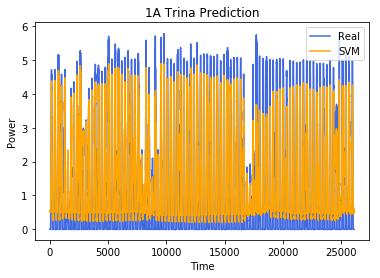

In [223]:
#真实值和预测值对比图
plt.plot(y_true,'royalblue',label='Real')
plt.plot(svm_pred,'orange',label='SVM')
# plt.plot(bp_pred,label='BP')
# plt.plot(dnn_pred,label='DNN')
# plt.plot(lstm_pred,label='LSTM')
plt.title('1A Trina Prediction')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/SVM.jpg')

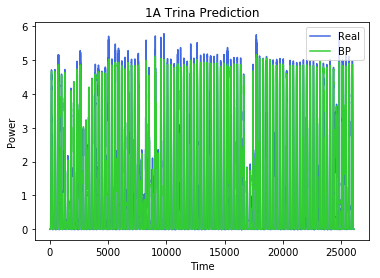

In [224]:
#真实值和预测值对比图
plt.plot(y_true,'royalblue',label='Real')
# plt.plot(svm_pred,label='SVM')
plt.plot(bp_pred,'limegreen',label='BP')
# plt.plot(dnn_pred,label='DNN')
# plt.plot(lstm_pred,label='LSTM')

plt.title('1A Trina Prediction')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/BP.jpg')

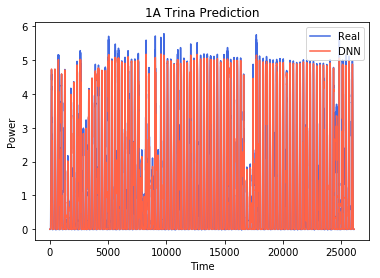

In [225]:
#真实值和预测值对比图
plt.plot(y_true,'royalblue',label='Real')
# plt.plot(svm_pred,label='SVM')
# plt.plot(bp_pred,label='BP')
plt.plot(dnn_pred,'tomato',label='DNN')
# plt.plot(lstm_pred,label='LSTM')

plt.title('1A Trina Prediction')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/DNN.jpg')

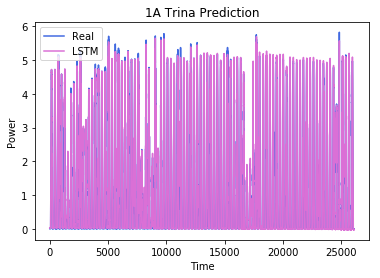

In [226]:
#真实值和预测值对比图
plt.plot(y_true,'royalblue',label='Real')
# plt.plot(svm_pred,label='SVM')
# plt.plot(bp_pred,label='BP')
# plt.plot(dnn_pred,label='DNN')
plt.plot(lstm_pred,'orchid',label='LSTM')

plt.title('1A Trina Prediction')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/LSTM.jpg')

# 保存

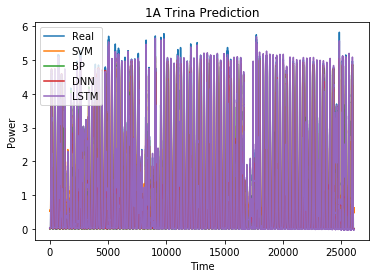

In [227]:
#真实值和预测值对比图
plt.plot(y_true,label='Real')
plt.plot(svm_pred,label='SVM')
plt.plot(bp_pred,label='BP')
plt.plot(dnn_pred,label='DNN')
plt.plot(lstm_pred,label='LSTM')

plt.title('1A Trina Prediction')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/SVMLSTM.jpg')

#训练集和测试集 预测结果保存
predict_ = pd.DataFrame(inv_test)
# predict_.columns = ['Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH', 'GHR', 'DHR',
#        'RGT', 'RDT', '1A Trina_power']
predict_.columns = ['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)', 'WTC(t-1)',
       'WRH(t-1)', 'GHR(t-1)', 'DHR(t-1)', 'WD(t-1)', 'WDR(t-1)', 'RGT(t-1)',
       'RDT(t-1)', '1A Trina_power(t-1)', '1A Trina_power(t)',
       '1A Trina_power(t+1)']
predict_['SVM'] = svm_pred
predict_['BP'] = bp_pred
predict_['DNN'] = dnn_pred
predict_['LSTM'] = lstm_pred
predict_.to_csv('../predict/1Atest_pred_-WDWDR_svm&bp&dnn.csv',index=False)


画出例如2020年1月20号的预测图

In [228]:
predict_.columns

Index(['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)', 'WTC(t-1)',
       'WRH(t-1)', 'GHR(t-1)', 'DHR(t-1)', 'WD(t-1)', 'WDR(t-1)', 'RGT(t-1)',
       'RDT(t-1)', '1A Trina_power(t-1)', '1A Trina_power(t)',
       '1A Trina_power(t+1)', 'SVM', 'BP', 'DNN', 'LSTM'],
      dtype='object')

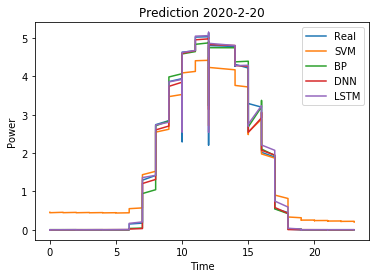

In [229]:
# from scipy.interpolate import spline
predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']] = predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
Day0120 = predict_.loc[(predict_['Month(t-1)'] == 2 ) & (predict_['Day(t-1)'] == 20),:]
#real_power_day.set_index('time', inplace=False)
Real=Day0120.set_index('Hour(t-1)', inplace=False)['1A Trina_power(t+1)']
svm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['SVM']
bp_pr=Day0120.set_index('Hour(t-1)', inplace=False)['BP']
dnn_pr=Day0120.set_index('Hour(t-1)', inplace=False)['DNN']
lstm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['LSTM']

fig = plt.figure()
plt.plot(Real,label='Real')
plt.plot(svm_pr,label='SVM')
plt.plot(bp_pr,label='BP')
plt.plot(dnn_pr,label='DNN')
plt.plot(lstm_pr,label='LSTM')

plt.title('Prediction 2020-2-20')
plt.ylabel('Power')
plt.xlabel('Time')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend()
plt.savefig('../picture/2-20pred.jpg')
#ax = fig.add_subplot(1,1,1)
#ax.plot(real_power_day_)
# real_power_day_.plot()
#real_power_day_.set_axis(['00:15:00','06:15:00','12:15:00','18:15:00'])
#real_power_day_

# 2020 

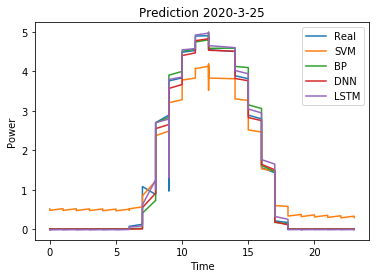

In [230]:
# from scipy.interpolate import spline
predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']] = predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
Day0120 = predict_.loc[(predict_['Month(t-1)'] == 3 ) & (predict_['Day(t-1)'] == 25),:]
#real_power_day.set_index('time', inplace=False)
Real=Day0120.set_index('Hour(t-1)', inplace=False)['1A Trina_power(t+1)']
svm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['SVM']
bp_pr=Day0120.set_index('Hour(t-1)', inplace=False)['BP']
dnn_pr=Day0120.set_index('Hour(t-1)', inplace=False)['DNN']
lstm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['LSTM']

fig = plt.figure()
plt.plot(Real,label='Real')
plt.plot(svm_pr,label='SVM')
plt.plot(bp_pr,label='BP')
plt.plot(dnn_pr,label='DNN')
plt.plot(lstm_pr,label='LSTM')

plt.title('Prediction 2020-3-25')
plt.ylabel('Power')
plt.xlabel('Time')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend()
plt.savefig('../picture/3-25pred.jpg')
#ax = fig.add_subplot(1,1,1)
#ax.plot(real_power_day_)
# real_power_day_.plot()
#real_power_day_.set_axis(['00:15:00','06:15:00','12:15:00','18:15:00'])
#real_power_day_